# CEAD ML project on the Ringenprinter. 

### Welcome to the Notebook in which I will explore and visualize the data of the collected data.  


## Imports and Settings

In [8]:
# imports
# system related
import sys
import subprocess

# basics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from datetime import datetime, time

# ml related
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import torch
import torch.nn as nn

# import scripts and functions
from functions import *


print('imports succesfull')

imports succesfull


In [2]:
# settings of pandas, usefull for data exploration
pd.options.display.width = 0
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 50)
# if reset is required:
# pd.reset_option('all')

## Import and Preprocessing data

In [4]:
# Defining import variables, _s stands for small
loc_s = '../data/dataset_small_23-09_14.04.45-14.17.30.csv'
start_s = '2022-09-23 14:04:45.000'
end_s = '2022-09-23 14:17:30.000'

# import, filter and outlier replacement on bead_width (mm)
df_s = import_csv_filt(loc_s, start_s, end_s, plot_outliers=False)

# choose which columns to keep
columns_to_keep = ['bead_width (mm)', 'screw_rpm (RPM)']
df_s = df_s[columns_to_keep]

print('import and preprocessing data succesfull')

import and preprocessing data succesfull


## Exploration

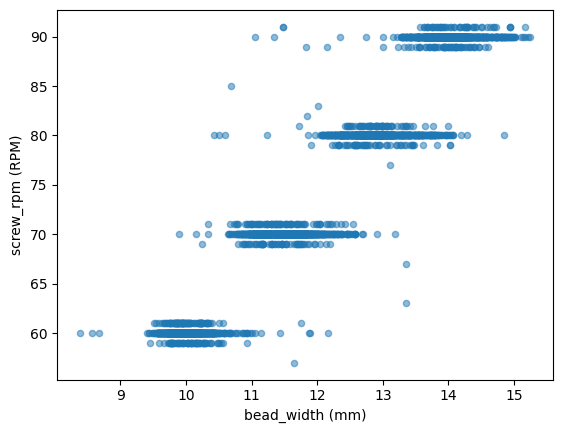

In [5]:
# plot
df_s.plot.scatter(x='bead_width (mm)', y='screw_rpm (RPM)', alpha=0.5)
plt.show()

## Adding history to selected features

In [6]:
# add some history of some columns
to_expand_columns = ['screw_rpm (RPM)']
df_s = df_add_column_history(df_s, to_expand_columns, n_columns=0, steps=2)

## Preparing data for ML use

In [7]:
# splitting features from supervisory data
X, y = split_to_np_feat_and_ans(df_s)

# TODO: build beginning of the ML framework!
# scale data and normalise data

# splitting the Train and Test data
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

## Exploring ML models

#### Linear Regression

In [11]:
# imports
from sklearn.linear_model import LinearRegression

# create model
clf = LinearRegression() 

# train model
clf.fit(X, y)


# predict on test set
y_pred = clf.predict(X_test)

print(np.round(np.stack((y_test, y_pred), axis = 0), 0))
print('r2 score is : ', r2_score(y_test, y_pred))

[[14. 12. 10. ... 13. 10. 13.]
 [13. 11. 10. ... 13. 10. 13.]]
r2 score is :  0.9391056172125091
